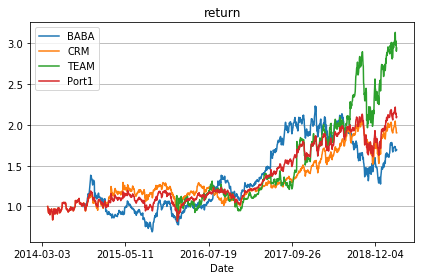

In [25]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# todo: 

#------------------------------
#-- 0. Read in D5
#------------------------------
df = pd.read_csv('D5_v_assets_ports_v.csv')

#----------------------------------------
#-- 1. calc return1, pivot AID to columns
#----------------------------------------
df['return1'] = df['mv']/df['cost']
pivoted = df.pivot(index='Date', columns='AID', values='return1')

# flatten
# ref: https://stackoverflow.com/questions/42708193/pandas-pivot-table-to-data-frame
# ref code:
# - flattened = pd.DataFrame(pivoted.to_records())
# - lattened.columns = [hdr.replace("('pills', ", "strength.").replace(")", "") for hdr in flattened.columns]

flattened = pd.DataFrame(pivoted.to_records())

#-------------------------------------------------
#-- 2. plot return1 
#-------------------------------------------------
def get_chart(df, cols):
    
    x1 = df['Date']
    y1 = df[cols]

    fig, ax1 = plt.subplots()

    #-- plot
    ax1.plot(x1, y1) # 

    #-- x1(date)
    plt.xticks(x1) # x1(Date)
    ax1.set_xlabel('Date')

    #-- set max xaxis n ticks
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
    
    #-- plot title
    plt.title('return')
    
    #-- plot legend
    plt.legend(cols)
    
    #-- horizontal grid
    ax1.yaxis.grid(True)

    #-- plot tight_layout, show
    plt.tight_layout()
    plt.show()
    
    
    
get_chart(df=flattened, cols=['BABA','CRM', 'TEAM', 'Port1'])

In [13]:


#------------------------------
#-- 3. Output to csv
#------------------------------
# Key: Date
df.to_csv('D6_v_assets_ports_h.csv',index=False) # csv does not have Date

KeyError: "['BABA' 'CRM' 'TEAM' 'Port1'] not in index"

In [5]:
df.tail()

AID,BABA,CRM,Port1,TEAM
Date,,,,
2019-03-22,1.680380,1.980855,2.135978,2.981967
2019-03-25,1.704310,1.973251,2.141599,2.982782
2019-03-26,1.697732,1.955098,2.144148,3.028667
2019-03-27,1.687721,1.902602,2.087981,2.904859
2019-03-28,1.694395,1.903338,2.100980,2.944771
